In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.preprocessing import MinMaxScaler


In [2]:
data=pd.read_csv("dataset-HAR-PUC-Rio.csv",delimiter=";")

C:\Users\giorgospc\AppData\Local\Temp\ipykernel_3552\330266005.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("dataset-HAR-PUC-Rio.csv",delimiter=";")


In [3]:
data
data1=data.loc[data['class'] == 'sitting']
data1["z4"]=data1["z4"].astype(int)
data1['z4'] = pd.to_numeric(data1['z4'], errors='coerce').fillna(0)


C:\Users\giorgospc\AppData\Local\Temp\ipykernel_3552\488146115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["z4"]=data1["z4"].astype(int)
C:\Users\giorgospc\AppData\Local\Temp\ipykernel_3552\488146115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['z4'] = pd.to_numeric(data1['z4'], errors='coerce').fillna(0)


In [4]:
data2=np.array(data1)
temp=data2[:,6:18]

print(temp.shape)
print(temp.min())








(50631, 12)
-700


In [6]:
import matplotlib.pyplot as plt

def normalize_and_encode(data,num_bits):
    # Shift the data to make all values positive
    shifted_data = data - np.min(data, axis=0)

    # Determine the maximum absolute value for scaling
    max_abs_value = np.max(np.abs(shifted_data), axis=0)

    # Normalize the shifted data to [-1, 1] range
    normalized_data = shifted_data / max_abs_value

    # Determine the number of bits required for encoding
    num_bits = num_bits

    # Encode the normalized data into binary representation
    encoded_data = np.unpackbits(((normalized_data[:, :, None] * (2**(num_bits - 1))).astype(np.int16) + (2**(num_bits - 1))).astype(np.uint8), axis=2)
    encoded_data = encoded_data.reshape(data.shape[0], -1)

    return encoded_data


# Selection function (tournament selection)
def selection(population, fitness_values, tournament_size=3):
    selected_parents = []
    for _ in range(len(population)):
        # Select tournament_size individuals randomly
        tournament_indices = np.random.choice(len(population), size=tournament_size, replace=False)
        tournament_fitness = fitness_values[tournament_indices]
        # Select the individual with the highest fitness from the tournament
        winner_index = tournament_indices[np.argmax(tournament_fitness)]
        selected_parents.append(population[winner_index])
    return selected_parents

# Crossover function (uniform crossover)
def crossover(parents, crossover_rate):
    offspring = []
    for i in range(0, len(parents), 2):
        parent1 = parents[i]
        parent2 = parents[i+1]
        if np.random.rand() < crossover_rate:
            # Perform uniform crossover
            child1 = np.empty_like(parent1)
            child2 = np.empty_like(parent2)
            for j in range(len(parent1)):
                if np.random.rand() < 0.5:
                    child1[j] = parent1[j]
                    child2[j] = parent2[j]
                else:
                    child1[j] = parent2[j]
                    child2[j] = parent1[j]
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])
    return offspring

# Mutation function (bit-flip mutation)
def mutation(offspring, mutation_rate):
    mutated_offspring = []
    for individual in offspring:
        mutated_individual = np.copy(individual)
        for i in range(len(mutated_individual)):
            if np.random.rand() < mutation_rate:
                mutated_individual[i] = 1 - mutated_individual[i]  # Flip the bit
        mutated_offspring.append(mutated_individual)
    return mutated_offspring





Generation: 0 Best Individual: [0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1
 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1] Fitness: 1.0
Generation: 1 Best Individual: [0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1] Fitness: 1.0
Generation: 2 Best Individual: [1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1
 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1] Fitness: 1.0
Generation: 3 Best Individual: [1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1] Fitness: 1.0
Generation: 4 Best Individual: [1 0 0 0 

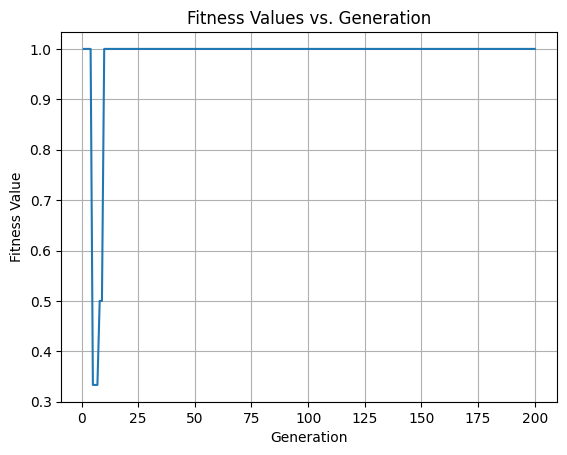

In [8]:


def fitness_function(individual, population):
    # Calculate the Hamming distance between the individual and each member of the population
    hamming_distances = np.sum(individual != population,axis=1)

    # Calculate the fitness value as the inverse of the Hamming distance
    fitness_values = 1 / (1 + hamming_distances)

    return fitness_values

# Genetic algorithm parameters
population_size = 20
mutation_rate = 0.001
num_generations = 200
crossover_rate=0.6
num_bits=20
encoded_data=normalize_and_encode(temp,num_bits)

# Initialize the population
population = []
for i in range(population_size):
    # Generate a random individual
    number_of_rows = encoded_data.shape[0]
    random_indices = np.random.choice(number_of_rows, size=1,replace=False)
    row = encoded_data[random_indices, :]
    row=row.reshape((96,))
    individual=row
    population.append(individual)

# Main loop
best_fitness=[]

for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    fitness_values = fitness_function(individual,population)

    # Select parents for reproduction
    parents = selection(population, fitness_values)

    # Apply crossover to create offspring
    offspring = crossover(parents,crossover_rate)

    # Apply mutation to the offspring
    mutated_offspring = mutation(offspring, mutation_rate)

    # Replace the population with the offspring
    population = mutated_offspring

    best_index = np.argmax(fitness_values)
    

    # Get the fitness value of the best individual
    best_fitness1 = fitness_values[best_index]
    best_fitness.append(best_fitness1)

    # Print the best individual and its fitness value
    best_individual = population[best_index]
    print("Generation:", generation, "Best Individual:", best_individual, "Fitness:", best_fitness1)

plt.plot((range(1, len(best_fitness) + 1)), best_fitness)
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.title('Fitness Values vs. Generation')
plt.grid(True)
plt.show()



In [106]:
from numpy.linalg import norm
def  calculate_distance(v,ts,c):
   
   cosine = np.dot(v,ts)/(norm(v)*norm(ts))
   s=0
   for i in range(v.shape[0]):
       cosine1=np.dot(v[i],ts[i])/(norm(v[i])*norm(ts[i]))
       s=s+cosine1 
   y=c*(1-1/4*s)
  
   return cosine+y/1+c




In [132]:
mean_values = np.mean(encoded_data, axis=1)
cosine = np.dot(encoded_data,mean_values)/(norm(encoded_data)*norm(mean_values))




ValueError: shapes (50631,96) and (50631,) not aligned: 96 (dim 1) != 50631 (dim 0)

In [131]:
cosine

array([0.13867505, 0.13867505, 0.        , 0.13867505, 0.        ,
       0.        , 0.13867505, 0.13867505, 0.        , 0.13867505,
       0.        , 0.13867505, 0.        , 0.13867505, 0.13867505,
       0.13867505, 0.13867505, 0.13867505, 0.        , 0.        ,
       0.        , 0.13867505, 0.13867505, 0.        , 0.13867505,
       0.        , 0.13867505, 0.        , 0.13867505, 0.        ,
       0.        , 0.        , 0.        , 0.13867505, 0.        ,
       0.13867505, 0.        , 0.13867505, 0.13867505, 0.13867505,
       0.13867505, 0.        , 0.13867505, 0.13867505, 0.        ,
       0.13867505, 0.13867505, 0.13867505, 0.        , 0.13867505,
       0.        , 0.13867505, 0.        , 0.13867505, 0.13867505,
       0.13867505, 0.        , 0.13867505, 0.        , 0.        ,
       0.        , 0.13867505, 0.13867505, 0.        , 0.        ,
       0.13867505, 0.        , 0.13867505, 0.        , 0.13867505,
       0.13867505, 0.        , 0.13867505, 0.        , 0.     